[<StepResult: t=0.0, dt=1728000.0, source=250.0>, <StepResult: t=1728000.0, dt=1728000.0, source=250.0>, <StepResult: t=3456000.0, dt=1728000.0, source=250.0>, <StepResult: t=5184000.0, dt=1728000.0, source=250.0>, <StepResult: t=6912000.0, dt=1728000.0, source=250.0>, <StepResult: t=8640000.0, dt=0.0, source=250.0>]
[[9.05452987e-04 3.38892927e-06]
 [9.10119554e-04 3.21832188e-06]
 [9.04374909e-04 3.82265228e-06]
 [8.86048737e-04 3.72082346e-06]
 [8.98469438e-04 3.87087911e-06]
 [8.89088212e-04 4.29395694e-06]]


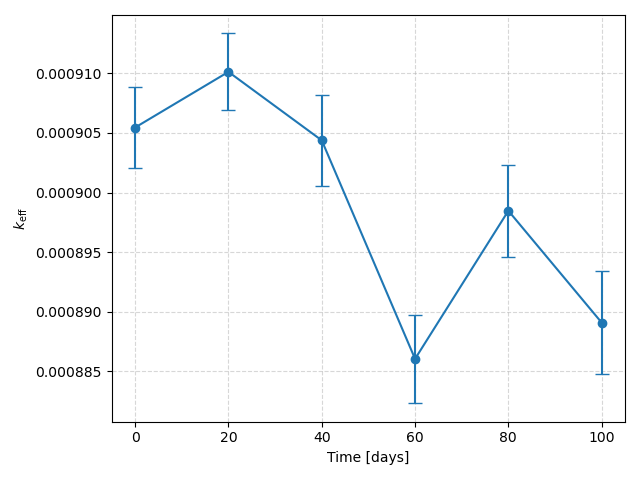

In [16]:
%matplotlib widget
import openmc.deplete as dep
import matplotlib.pyplot as plt
plt.clf()
res = dep.Results("../openmc_debug/depletion_results.h5")
print(res)
time, keff = res.get_keff()
print(keff)
keff_mean = keff[:, 0]
keff_std  = keff[:, 1]
time = time/8.64e4
plt.errorbar(time, keff_mean, yerr=keff_std, fmt='o-', capsize=5)
#plt.xlabel('Depletion Step')
plt.ylabel(r'$k_\text{eff}$')
plt.xlabel('Time [days]')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:
!pwd

/Users/richardanderson/workdir/suliwork/pebbletest


Number of primary histories: 1000


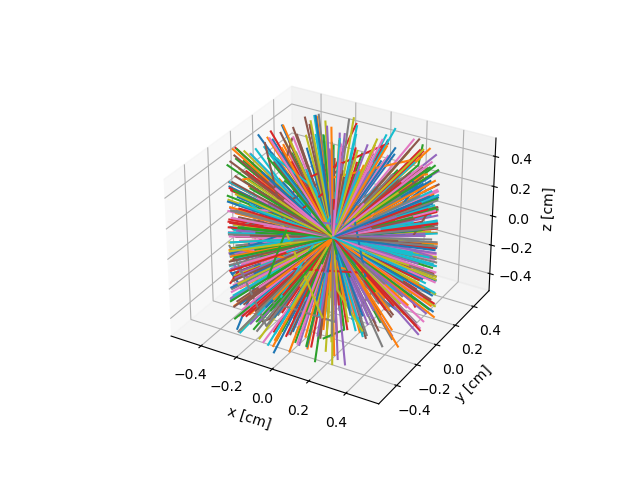

In [28]:
import openmc                   
import matplotlib.pyplot as plt 

tracks = openmc.Tracks("../openmc_debug/tracks.h5")

print("Number of primary histories:", len(tracks))
#print("Coordinate array shape     :", tracks.coords.shape)

tracks.plot()
tracks.write_to_vtk("tracks.vtp")
plt.show()


- Print out power level. Does it change? 
- Monitor Flux
- How does U composition change?
- Make some geometry plots. 

In [11]:
!pwd

/Users/richardanderson/workdir/suliwork/pebbletest


In [15]:
import glob
import openmc
import numpy as np
import matplotlib.pyplot as plt

fps = sorted(glob.glob("../openmc_debug/statepoint.100.h5"))
times = []
flux  = []

for fn in fps:
    sp = openmc.StatePoint(fn)
    # pull your flux tally by name
    print(fn)
    tally = sp.get_tally(name="cell flux")
    print(tally)
    flux.append(tally.mean.flatten()[0])  
    times.append(sp.current_time/86400.0)

plt.plot(times, flux, 'o-')
plt.xlabel("Time [days]")
plt.ylabel("Flux [n/cm²·s]")
plt.show()





../openmc_debug/statepoint.100.h5


LookupError: Unable to get Tally

In [2]:
import h5py
import numpy as np

with h5py.File("depletion_results.h5", "r") as f:
    print("Top-level entries:", list(f.keys()))

    for name in f:
        obj = f[name]
        print(f"\nEntry: {name}")
        print(f"  Type: {type(obj)}")

        if isinstance(obj, h5py.Group):
            print(f"  Keys inside group: {list(obj.keys())}")
            if "v0" in obj.attrs:
                print(f"  v0 attribute: {obj.attrs['v0']}")
        elif isinstance(obj, h5py.Dataset):
            print("  Dataset — no nested keys")
            raw = obj[()]
            print("  shape:", raw.shape)
            print("  dtype:", raw.dtype)

            if raw.dtype.names is not None:
                print("  Field names:", raw.dtype.names)
                print("  First 3 entries:\n", raw[:3])
            else:
                print("  Data (first 10 elements):", raw.flatten()[:10])


Top-level entries: ['depletion time', 'eigenvalues', 'materials', 'nuclides', 'number', 'reaction rates', 'reactions', 'source_rate', 'time']

Entry: depletion time
  Type: <class 'h5py._hl.dataset.Dataset'>
  Dataset — no nested keys
  shape: (6,)
  dtype: float64
  Data (first 10 elements): [10.19912219  9.70157409 11.56518817 13.78648281 12.95981908 12.95981908]

Entry: eigenvalues
  Type: <class 'h5py._hl.dataset.Dataset'>
  Dataset — no nested keys
  shape: (6, 2, 2)
  dtype: float64
  Data (first 10 elements): [1.06977192 0.00307456 1.07267222 0.00310159 1.07175601 0.00310882
 1.06960837 0.0027773  1.06822517 0.00294495]

Entry: materials
  Type: <class 'h5py._hl.group.Group'>
  Keys inside group: ['1']

Entry: nuclides
  Type: <class 'h5py._hl.group.Group'>
  Keys inside group: ['Ac206', 'Ac206_m1', 'Ac207', 'Ac208', 'Ac208_m1', 'Ac209', 'Ac210', 'Ac211', 'Ac212', 'Ac213', 'Ac214', 'Ac215', 'Ac216', 'Ac216_m1', 'Ac217', 'Ac218', 'Ac219', 'Ac220', 'Ac221', 'Ac222', 'Ac222_m1', 'A

In [9]:
import xml.etree.ElementTree as ET

def list_all_tags(path_to_n42):
    tags = set()
    for event, elem in ET.iterparse(path_to_n42, events=("start",)):
        tags.add(elem.tag)
        elem.clear()
    return tags

def strip_namespace(tag):
    return tag.split("}")[-1] if "}" in tag else tag

if __name__ == "__main__":
    import os
    folder = "/Users/richardanderson/Downloads/N42/"
    filename = os.listdir(folder)[0]
    print(filename)
    fullpath = folder + filename

    all_tags = list_all_tags(fullpath)

    '''
    print("All tags (including namespaces):")
    for t in sorted(all_tags):
        print(f"  {t}")
    '''

    print("\nAll tags (local names only):")
    local_names = {strip_namespace(t) for t in all_tags}
    for name in sorted(local_names):
        print(f"  {name}")

    


249943_07.N42

All tags (local names only):
  ChannelData
  CoefficientValues
  EnergyCalibration
  LiveTimeDuration
  MeasurementClassCode
  Origin
  OriginDescription
  RadDetectorCategoryCode
  RadDetectorInformation
  RadDetectorKindCode
  RadDetectorState
  RadInstrumentClassCode
  RadInstrumentComponentName
  RadInstrumentComponentVersion
  RadInstrumentData
  RadInstrumentDataCreatorName
  RadInstrumentInformation
  RadInstrumentManufacturerName
  RadInstrumentModelName
  RadInstrumentVersion
  RadItemState
  RadMeasurement
  RealTimeDuration
  RelativeLocation
  Remark
  Spectrum
  StartDateTime
  StateVector


In [4]:
import xml.etree.ElementTree as ET

tree = ET.parse(fullpath)
root = tree.getroot()

def strip_namespace(tag):
    return tag.split("}")[-1] if "}" in tag else tag

def extract_spectrum_data(root):
    spectrum_data = []
    for rad_measurement in root.iter():
        if strip_namespace(rad_measurement.tag) == 'RadMeasurement':
            for spectrum in rad_measurement:
                if strip_namespace(spectrum.tag) == 'Spectrum':
                    for channel_data in spectrum:
                        if strip_namespace(channel_data.tag) == 'ChannelData':
                            channel_values = channel_data.text.strip()
                            spectrum_data.append([int(x) for x in channel_values.split()])
    return spectrum_data

spectrum_data = extract_spectrum_data(root)

def extract_tag_text(root, tag_name):
    texts = []
    for elem in root.iter():
        if strip_namespace(elem.tag) == tag_name:
            if elem.text:
                texts.append(elem.text.strip())
    return texts

rad_instrument_models = extract_tag_text(root, 'RadInstrumentModelName')
for model in rad_instrument_models:
    print(f"Instrument Model: {model}")


local_names = {strip_namespace(t) for t in all_tags}
for name in sorted(local_names):
    print(f'{name}', extract_tag_text(root, name))

Instrument Model: unknown
ChannelData ['0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 16 255 1793 5837 9671 11207 11186 11115 11225 11097 10923 10986 11359 11161 11076 11234 11265 11428 11138 11406 11504 11375 11474 11603 11813 12090 12239 12447 12804 13172 13738 14418 14474 14144 13973 14253 14320 14987 14990 15269 15539 15839 16094 16266 16916 17496 18108 18609 19279 19932 20865 21734 22810 23694 24157 24878 25437 26273 26678 26834 27673 29333 34982 40930 37031 30094 27721 28185 28887 28411 27983 27563 27658 28313 29102 31098 32962 34188 33150 30406 28104 28431 31399 38872 45691 49939 47154 43865 47720 70501 95505 84909 51984 34124 30438 33901 54682 83791 77780 56299 47210 50142 51773 44912 38343 28829 24934 29261 33814 28427 20110 17450 19444 22491 21745 20885 22441 24126 22303 17364 15567 17135 18978 18421 17144 15958 15315 15006 14973 14998 15373 15342 15766 15932 15865 16311 16619 16899 16953 17388 17116 17110 

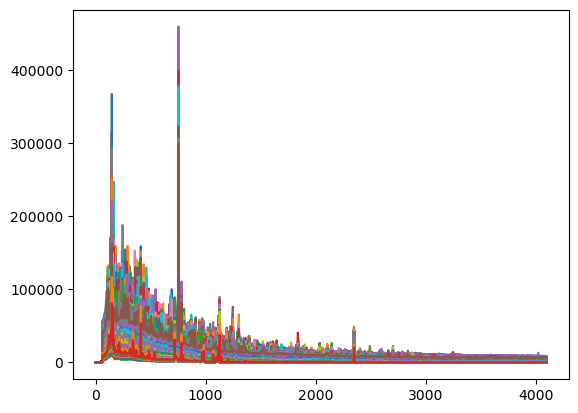

<Figure size 400x200 with 0 Axes>

In [44]:
%matplotlib inline
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
def strip_namespace(tag):
    return tag.split("}")[-1] if "}" in tag else tag

def extract_spectrum_data(root):
    spectrum_data = []
    for rad_measurement in root.iter():
        if strip_namespace(rad_measurement.tag) == 'RadMeasurement':
            for spectrum in rad_measurement:
                if strip_namespace(spectrum.tag) == 'Spectrum':
                    for channel_data in spectrum:
                        if strip_namespace(channel_data.tag) == 'ChannelData':
                            channel_values = channel_data.text.strip()
                            spectrum_data.append([int(x) for x in channel_values.split()])
    return spectrum_data

#spectrum_data = extract_spectrum_data(root)

def extract_tag_text(root, tag_name):
    texts = []
    for elem in root.iter():
        if strip_namespace(elem.tag) == tag_name:
            if elem.text:
                texts.append(elem.text.strip())
    return texts

if __name__ == "__main__":
    folder = "/Users/richardanderson/Downloads/N42/"
    for filename in os.listdir(folder):
        fullpath = folder + filename
        tree = ET.parse(fullpath)
        root = tree.getroot()
        #local_names = {strip_namespace(t) for t in all_tags}
        spectrum = extract_tag_text(root, 'ChannelData')
        spectrum = np.fromstring(spectrum[0], dtype=int, sep=' ')
        plt.plot(spectrum)

plt.figure(figsize=(4, 2))
plt.show()

In [50]:
print(np.trapz([0, 1, 4, 9, 16, 25], [0, 1, 2, 3, 4, 5]))

print(1/3*5**3)

42.5
41.666666666666664
